Error at endpoint:  0.04558324979514872


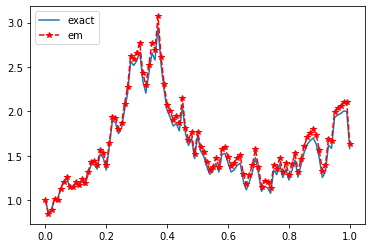

In [14]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100)

gamma=2; mu=1; Xzero=1
T=1; N=100; dt = float(T)/N
t=np.linspace(0,T,N+1)

dW=np.sqrt(dt)*np.random.randn(1,N)
W=np.cumsum(dW)

Xtrue=Xzero*np.exp((gamma-0.5*mu**2)*t[1:]+mu*W); Xtrue=np.insert(Xtrue,0,Xzero)
ax=plt.subplot(111)
ax.plot(t,Xtrue)

R=1; Dt=R*dt; L=int(N/R)
Xem=np.zeros(L+1); Xem[0] = Xzero

for j in range(1,L+1):
    Winc=np.sum(dW[0][range(R*(j-1),R*j)])
    Xem[j] = Xem[j-1] + Dt*gamma*Xem[j-1] + mu*Xem[j-1]*Winc

emerr=np.abs(Xem[-1]-Xtrue[-1])
print ("Error at endpoint: ", emerr)

ax.plot(np.linspace(0,T,L+1),Xem,'r--*')
ax.legend(("exact","em"),loc=2)
plt.show()